In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

sys.path.insert(0, '../kinetic_analysis')
from kinetic_function import (single_track_analysis,
                              generate_track
                             )

In [2]:
path_save = "/home/u2175049/Documents/Code/KineticAnalysis/notebook/figures/"
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/2-Datas/05-Modelling/03-DeltaT_TrackLength/"

In [3]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390,
    "very_long_prot":2000, 
}

In [81]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
for i in range(100):
    x_global, y_global, y_start_prot = generate_track(prot_length = prot_aa_size["snail"], 
                                                      suntag_length = prot_aa_size["32xsuntag"], 
                                                      nb_suntag=32, 
                                                      fluo_one_suntag=4, 
                                                      translation_rate=5, 
                                                      binding_rate=0.05,
                                                      step = 0.1,
                                                      length=82000)
    if i == 0:
        datas = pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })
    else:
        datas = pd.concat([datas, 
                           pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })], ignore_index=True)

datas.to_csv(os.path.join(path, "datas_dt_track_length_translation_rate_5.csv"))

In [51]:
datas = pd.read_csv(os.path.join(path, "datas_dt_track_length.csv"), index_col="Unnamed: 0")

False

In [82]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
first = True
for t in [1, 10, 30, 50, 100, 300, 600]:
    dt = t*0.1
    for length_track in [50, 100, 150, 200, 500, 1000, 5000, 10000, 20000, 50000]:
        
        for i in range(100):
            datas2 = datas[datas["TRACK_ID"]==i][::t][:length_track]
            if (len(np.unique(datas2["MEAN_INTENSITY_CH1"])) > 1) & (len(datas2) in [50, 100, 150, 200, 500, 1000, 5000, 10000, 20000, 50000]):
                (x, 
                y, 
                x_auto, 
                y_auto, 
                elongation_r, 
                translation_init_r,
                perr) = single_track_analysis(datas2, 
                                             i, 
                                             delta_t = dt,
                                             protein_size=prot_length,
                                             normalise_intensity=1,
                                             normalise_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-1,
                                             method="linear",
                                             force_analysis=True,
                                             first_dot=True,
                                             simulation=True)
                if first:
                    results = pd.DataFrame({"elongation_r":elongation_r, 
                                            "init_translation_r":translation_init_r, 
                                            "dt":dt,
                                            "long_track":datas2.shape[0],
                                           "id":i},
                                          index=[0])
                    first = False
                
                else:
                    results = pd.concat([results, 
                                    pd.DataFrame({"elongation_r":elongation_r, 
                                                  "init_translation_r":translation_init_r, 
                                                  "dt":dt, 
                                                  "long_track":datas2.shape[0],
                                                  "id":i}, index=[0])
                                    ], ignore_index=True)
                    
results.to_csv(os.path.join(path, "results_dt_track_length_translation_rate_5.csv"))

In [97]:
results = pd.read_csv(os.path.join(path, "results_dt_track_length_translation_rate_24.csv"), index_col="Unnamed: 0")

In [98]:
results.groupby(by=['dt', 'long_track'])[['elongation_r','init_translation_r']].mean()

elongation_r  init_translation_r
dt   long_track                                  
0.1  50            294.042060            0.242321
     100           168.954402            1.549668
     150           125.528136            3.179517
     200           117.270378            4.898637
     500            59.542447           14.255243
     1000           36.858003           19.684977
     5000           23.274026           26.768189
     10000          22.457755           26.379244
     20000          21.816636           25.639592
     50000          21.292643           25.957827
1.0  50             57.886174           14.271188
     100            34.724571           20.390049
     150            30.232045           22.691116
     200            28.482763           26.505020
     500            22.956666           27.070372
     1000           22.056850           26.839431
     5000           20.826275           26.568634
     10000          21.223455           26.456979
     20000          21.319838           25.898768
     50000          21.643790           25.743758
3.0  50             29.885604           23.016560
     100            24.318423           27.096810
     150            22.354581           29.281276
     200            22.916760           27.530963
     500            21.031429           27.541640
     1000           21.175602           26.673351
     5000           21.103286           26.542914
     10000          21.558284           26.198121
     20000          21.556736           26.097167
5.0  50             24.336460           27.738068
     100            22.671550           27.976918
     150            22.320661           28.218123
     200            21.809307           27.735684
     500            21.299216           27.031580
     1000           20.179203           27.776665
     5000           20.787393           27.131310
     10000          20.873930           26.991051
10.0 50             22.017684           29.203611
     100            21.456687           28.878541
     150            20.666285           28.952979
     200            20.601145           28.351330
     500            19.973832           28.885181
     1000           19.862206           29.184287
     5000           20.268334           28.359831
30.0 50             14.422144           34.550786
     100            15.460598           33.388328
     150            16.096422           34.647125
     200            16.014178           35.918829
     500            15.428354           37.517939
     1000           15.369054           37.842800
60.0 50              3.179428           31.488866
     100             3.192256           27.634048
     150             3.472750           31.288954
     200             3.697122           34.029489
     500             3.522167           31.239974
     1000            3.136367           29.530267

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


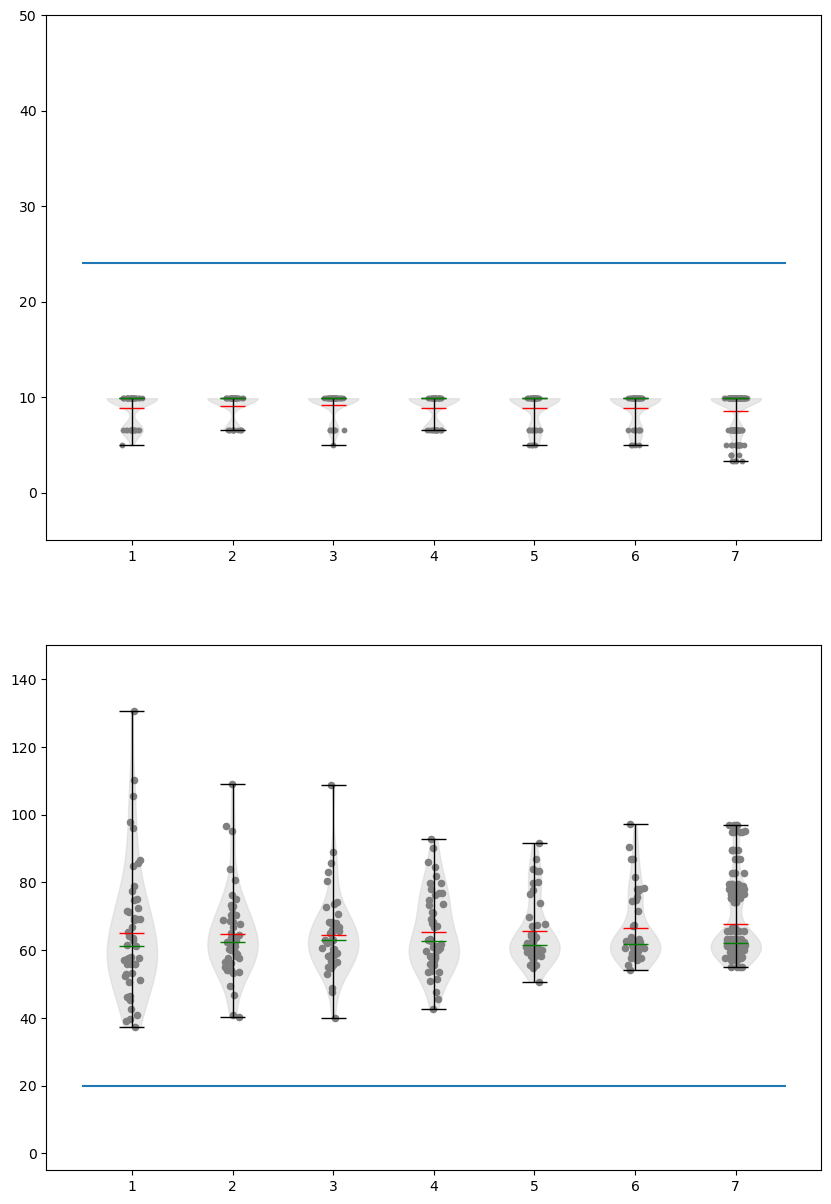

In [73]:
fig, ax = plt.subplots(2,1)


50,100,150, 200, 500
violin = ax[0].violinplot(dataset = [
#     results[(results.dt == 0.1) & (results.long_track == 50)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 100)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 150)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 200)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 500)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 1000)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 5000)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 10000)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 20000)]["elongation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 50000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 50)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 100)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 150)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 200)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 500)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 1000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 5000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 10000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 20000)]["elongation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 50000)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 50) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 100) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 150) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 200) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 500) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 1000) & (results.elongation_r>0)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track > 1000) & (results.elongation_r>0)]["elongation_r"].values
    ],
     showmeans=True,
      showmedians=True)

for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)
    
colors = ["black", "black", "black", "red", "green"]
i=0
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin[partname]
    vp.set_edgecolor(colors[i])
    vp.set_linewidth(1)
    i+=1
# results.boxplot(['init_translation_r'] , 
#                by=['dt', "long_track"], 
#                grid=False, 
#                ax = ax[1],
#                rot=90,
#                boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
#                medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
#                )


violin = ax[1].violinplot(dataset = [
#     results[(results.dt == 0.1) & (results.long_track == 50)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 100)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 150)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 200)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 500)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 1000)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 5000)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 10000)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 20000)]["init_translation_r"].values,
#     results[(results.dt == 0.1) & (results.long_track == 50000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 50)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 100)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 150)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 200)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 500)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 1000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 5000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 10000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 20000)]["init_translation_r"].values,
#     results[(results.dt == 1.0) & (results.long_track == 50000)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 50) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 100) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 150) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 200) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 500) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 1000) & (results.elongation_r>0)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track > 1000) & (results.elongation_r>0)]["init_translation_r"].values
    ],
     showmeans=True,
      showmedians=True)

for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)
    
colors = ["black", "black", "black", "red", "green"]
i=0
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin[partname]
    vp.set_edgecolor(colors[i])
    vp.set_linewidth(1)
    i+=1

group = ['dt', "long_track"]
column = 'elongation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    if name[0] == 60:
        names.append(name)
        vals.append(subdf[column][subdf[column]>0].to_list())
        xs.append(np.random.normal(i+1-20, 0.04, subdf[column][subdf[column]>0].shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
group = ['dt', "long_track"]
column = 'init_translation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    if name[0] == 60:
        names.append(name)
        vals.append(subdf[column][subdf[column]>0].to_list())
        xs.append(np.random.normal(i+1-20, 0.04, subdf[column][subdf[column]>0].shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)

def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Elongation rate')
# set style for the axes
labels = [50,100,150,200,500,1000, "++"]
for a in ax:
    set_axis_style(a, labels)

ax[0].set_ylabel("Estimate elongation rate")
ax[1].set_ylabel("Estimate initiation rate")

ax[0].set_ylim(-5,50)
ax[1].set_ylim(-5, 150)
ax[0].hlines(24, 0.5, 7.5)
ax[1].hlines(1/0.05, 0.5, 7.5)
fig.set_size_inches((10,15))
# fig.savefig(os.path.join(path_save, "results_delta_t_length_boxplot_linear_diff_60.eps"), dpi=300)

(0.0, 50.0)

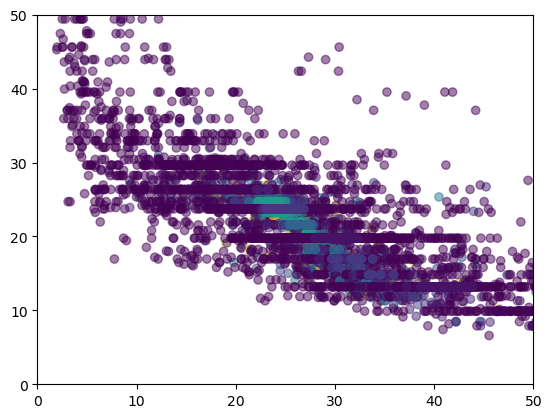

In [55]:
fig, ax = plt.subplots()
ax.scatter(results["init_translation_r"], results["elongation_r"], c=results["long_track"], alpha=0.5)
ax.set_xlim(0,50)
ax.set_ylim(0,50)

In [56]:
results[(results.dt == 60.0) & (results.long_track >1000) & (results.elongation_r>0)]

,elongation_r,init_translation_r,dt,long_track,id
2175,6.588889,77.911743,60.0,1364,0
2183,9.883333,62.097059,60.0,1364,8
2184,9.883333,61.916483,60.0,1364,9
2188,9.883333,58.012350,60.0,1364,13
2189,6.588889,77.330932,60.0,1364,14
...,...,...,...,...,...
2964,6.588889,78.942728,60.0,1364,89
2966,9.883333,57.874484,60.0,1364,91
2967,9.883333,61.469898,60.0,1364,92
2970,9.883333,66.423445,60.0,1364,95


In [99]:
results_group = results.groupby(["dt", "long_track"]).mean()
results_group.reset_index(inplace=True)

elongation_ref = 24

results_group["elongation_r_diff"] = elongation_ref-results_group['elongation_r']
results_group["elongation_r_ratio"] = 100*results_group["elongation_r"]/elongation_ref - 100
results_group["elongation_r_ratio"]= np.abs(results_group["elongation_r_ratio"])


results_group["init_translation_r_diff"] = 20-results_group['init_translation_r']
results_group["init_translation_r_ratio"] = 100*results_group["init_translation_r"]/20 -100
results_group["init_translation_r_ratio"] = np.abs(results_group["init_translation_r_ratio"])

results_group

,dt,long_track,elongation_r,init_translation_r,id,elongation_r_diff,elongation_r_ratio,init_translation_r_diff,init_translation_r_ratio
0,0.1,50,294.042060,0.242321,49.390805,-270.042060,1125.175249,19.757679,98.788396
1,0.1,100,168.954402,1.549668,49.431579,-144.954402,603.976677,18.450332,92.251659
2,0.1,150,125.528136,3.179517,49.500000,-101.528136,423.033902,16.820483,84.102415
3,0.1,200,117.270378,4.898637,49.020619,-93.270378,388.626576,15.101363,75.506813
4,0.1,500,59.542447,14.255243,49.500000,-35.542447,148.093527,5.744757,28.723786
5,0.1,1000,36.858003,19.684977,49.500000,-12.858003,53.575014,0.315023,1.575116
6,0.1,5000,23.274026,26.768189,49.500000,0.725974,3.024890,-6.768189,33.840944
7,0.1,10000,22.457755,26.379244,49.500000,1.542245,6.426020,-6.379244,31.896222
8,0.1,20000,21.816636,25.639592,49.500000,2.183364,9.097350,-5.639592,28.197958
9,0.1,50000,21.292643,25.957827,49.500000,2.707357,11.280652,-5.957827,29.789134


Text(847.0858585858584, 0.5, 'track length')

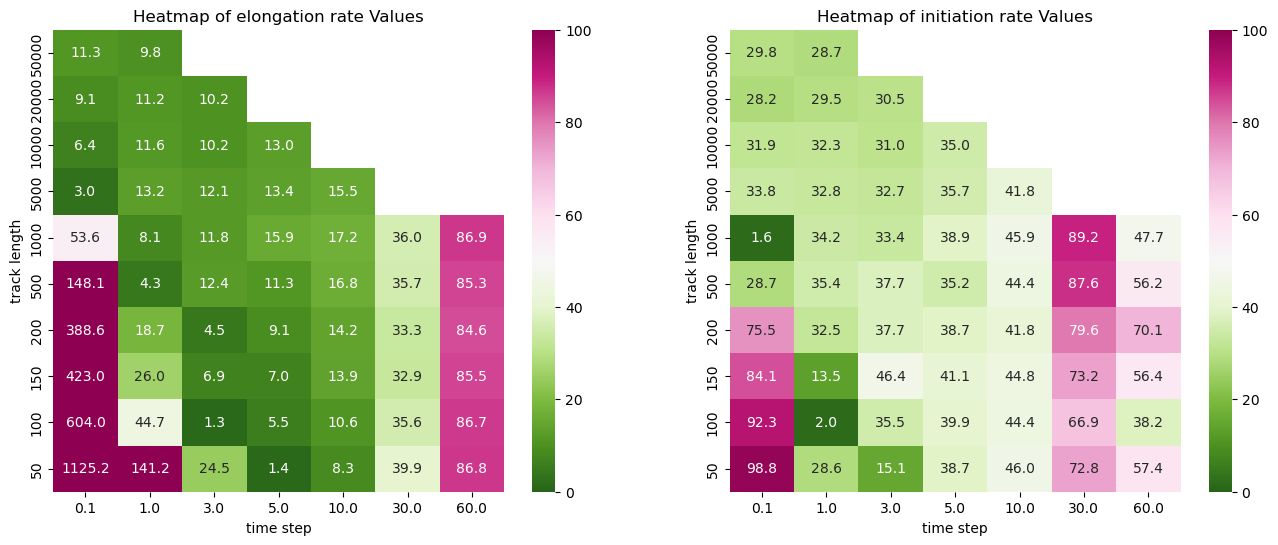

In [100]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# Create a symmetric colormap
color = plt.cm.coolwarm
color_r = plt.cm.coolwarm_r
combined_colors = ListedColormap(color_r(np.linspace(0, 1, 128)).tolist() +
                                 color(np.linspace(0, 1, 128)).tolist())

heatmap_data = results_group.pivot(index='long_track', columns='dt', values='elongation_r_ratio')

# Create the heatmap
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
# plt.figure(figsize=(8, 6))
ax1 = sns.heatmap(heatmap_data, 
                 annot=True, 
                 fmt=".1f", 
                 cmap="PiYG_r",
                 vmin = 0,
                 vmax = 100,
                 ax=ax1)
# Invert the y-axis
ax1.invert_yaxis()
ax1.set_title("Heatmap of elongation rate Values")
ax1.set_xlabel("time step")
ax1.set_ylabel("track length")



heatmap_data = results_group.pivot(index='long_track', columns='dt', values='init_translation_r_ratio')
ax2 = sns.heatmap(heatmap_data, 
                 annot=True, 
                 fmt=".1f", 
                 cmap="PiYG_r",
                 vmin = 0,
                 vmax = 100, 
                  ax = ax2
                )
# Invert the y-axis
ax2.invert_yaxis()
ax2.set_title("Heatmap of initiation rate Values")
ax2.set_xlabel("time step")
ax2.set_ylabel("track length")

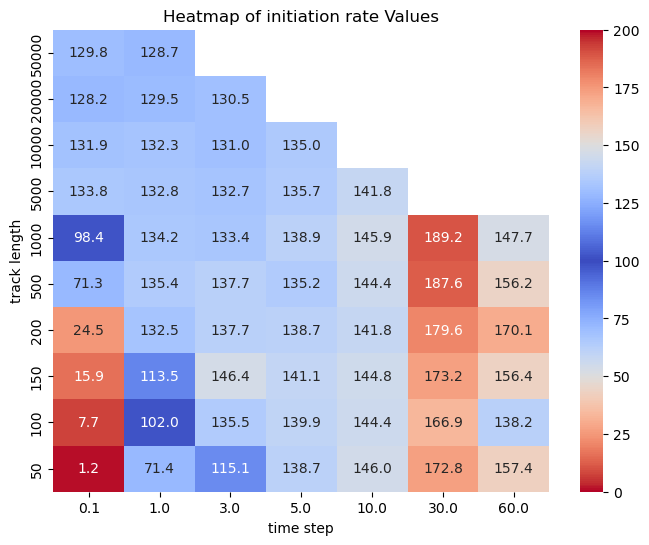

In [71]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# Create a symmetric colormap
color = plt.cm.coolwarm
color_r = plt.cm.coolwarm_r
combined_colors = ListedColormap(color_r(np.linspace(0, 1, 128)).tolist() +
                                 color(np.linspace(0, 1, 128)).tolist())

heatmap_data = results_group.pivot(index='long_track', columns='dt', values='init_translation_r_ratio')

# Create the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(heatmap_data, 
                 annot=True, 
                 fmt=".1f", 
                 cmap=combined_colors,
                 vmin = 0,
                 vmax = 200
                )
# Invert the y-axis
ax.invert_yaxis()

plt.title("Heatmap of initiation rate Values")
plt.xlabel("time step")
plt.ylabel("track length")
plt.show()